<a href="https://colab.research.google.com/github/UznetDev/Data-science-home-work/blob/main/20_Noy_2024_home_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install optuna

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_predict
from math import sqrt
import matplotlib.pyplot as plt
import statsmodels.api as sm
import optuna
import pandas as pd
import numpy as np
from math import sqrt

In [ ]:
df = pd.read_csv('https://assets.datacamp.com/production/repositories/1120/datasets/850e5614f8de4b134f40b4eeca27c7d0b91aeed2/NOAA_TAVG.csv',
                 parse_dates=["DATE"],
                 index_col="DATE"
                 ).dropna()

In [ ]:
df.head(1)

,TAVG
DATE,
1870-01-01,53.8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 147 entries, 1870-01-01 to 2016-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TAVG    147 non-null    float64
dtypes: float64(1)
memory usage: 2.3 KB


In [ ]:
df.index = pd.to_datetime(df.index)
df = df.asfreq('D')

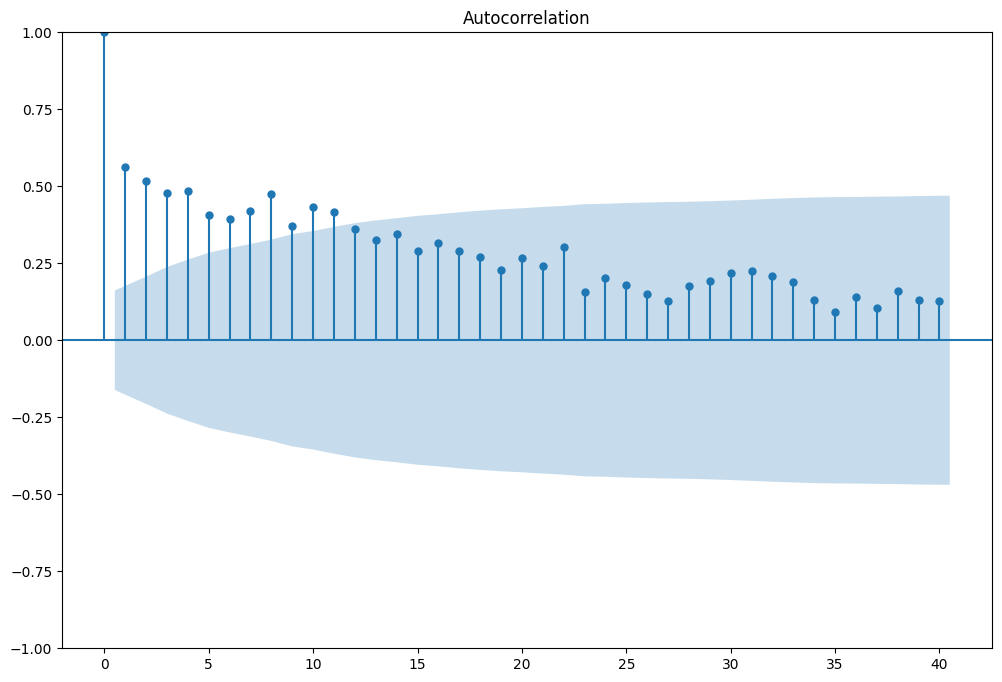

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = plot_acf(df['TAVG'], lags=40, ax=ax)

In [ ]:
arima_project = ARIMA(df['TAVG'], order=(1, 1, 1))
res = arima_project.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [ ]:
res.bic

504.6258217103966

In [ ]:
res.aic

477.97334008037797

In [ ]:
def objective(trial):
  try:
      p = trial.suggest_int("p", 0, 20)
      d = trial.suggest_int("d", 0, 20)
      q = trial.suggest_int("q", 0, 20)
      model = ARIMA(df['TAVG'], order=(p, d, q))
      results = model.fit()
      return (results.bic + results.aic)
  except:
      return np.inf

In [ ]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

[I 2024-11-21 08:01:39,320] A new study created in memory with name: no-name-d9587016-c0ea-4e46-bd4c-5493a828b676
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dis

In [ ]:
print("Best parameters:", study.best_params)
print("Best value (combined BIC + AIC):", study.best_value)

Best parameters: {'p': 9, 'd': 20, 'q': 4}
Best value (combined BIC + AIC): 95.81861921042028


In [ ]:
p, d, q = 9, 4, 4
model = ARIMA(df['TAVG'], order=(p, d, q))
results = model.fit()
results.bic, results.aic

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check

(591.1183286337241, 549.6385038100855)

In [ ]:
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                   TAVG   No. Observations:                53326
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -235.987
Date:                Thu, 21 Nov 2024   AIC                            477.973
Time:                        10:22:23   BIC                            504.626
Sample:                    01-01-1870   HQIC                           486.297
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8546   1.41e+04  -6.07e-05      1.000   -2.76e+04    2.76e+04
ma.L1         -0.9694   1575.738     -0.001      1.000   -3089.359    3087.421
sigma2         0.3471   3.04e+04   1.14e-05      1.0

In [ ]:
predictions = results.get_prediction(start=pd.to_datetime('2017-01-01'), end=pd.to_datetime('2024-01-01'))
predicted_mean = predictions.predicted_mean
prediction_df = pd.DataFrame({'DATE': predicted_mean.index, 'TAVG': predicted_mean.values})
prediction_df

,DATE,TAVG
0,2017-01-01,56.616763
1,2018-01-01,57.873006
2,2019-01-01,57.344689
3,2020-01-01,57.648146
4,2021-01-01,57.359843
5,2022-01-01,57.789614
6,2023-01-01,58.959889
7,2024-01-01,58.842518


In [ ]:
tavg_data = {
    2017: 13.3,
    2018: 12.9,
    2019: 13.1,
    2020: 13.5,
    2021: 13.2,
    2022: 13.4,
    2023: 13.6,
    2024: 13.7
}
prediction_df['REAL'] = tavg_data.values()
prediction_df

,DATE,TAVG,REAL
0,2017-01-01,56.616763,13.3
1,2018-01-01,57.873006,12.9
2,2019-01-01,57.344689,13.1
3,2020-01-01,57.648146,13.5
4,2021-01-01,57.359843,13.2
5,2022-01-01,57.789614,13.4
6,2023-01-01,58.959889,13.6
7,2024-01-01,58.842518,13.7


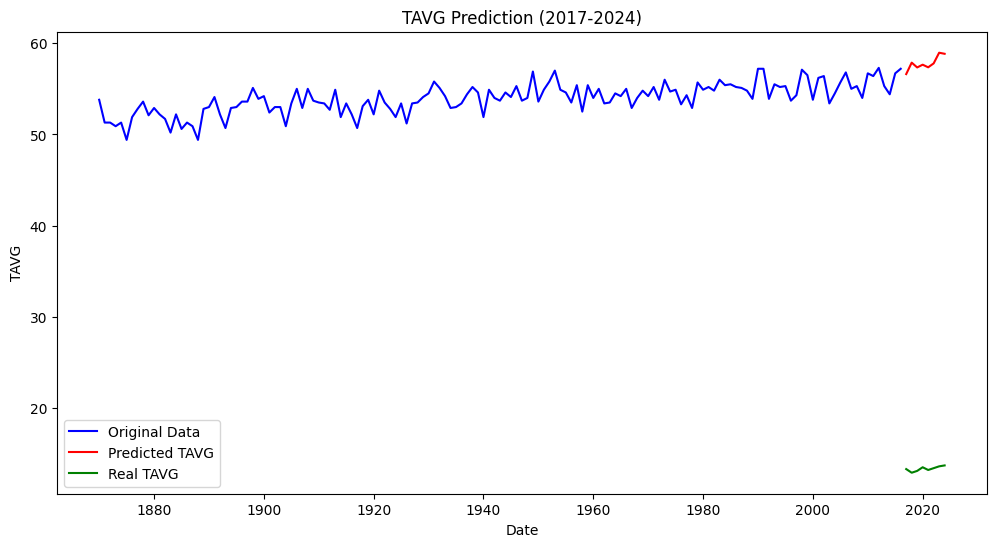

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df['TAVG'], label='Original Data', color='blue')
ax.plot(prediction_df['DATE'], prediction_df['TAVG'], label='Predicted TAVG', color='red')
ax.plot(prediction_df['DATE'], prediction_df['REAL'], label='Real TAVG', color='green')
ax.set_xlabel('Date')
ax.set_ylabel('TAVG')
ax.set_title('TAVG Prediction (2017-2024)')
ax.legend()
plt.show()

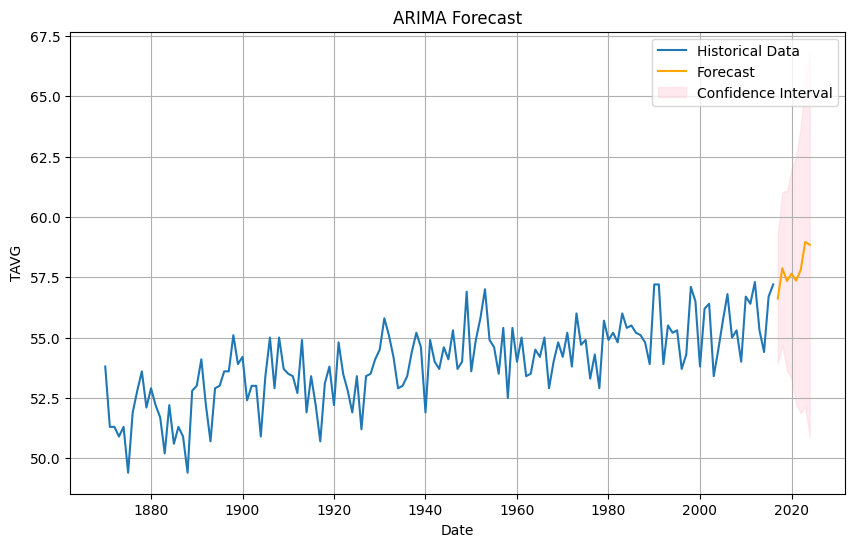

In [ ]:
predicted_mean = predictions.predicted_mean
conf_int = predictions.conf_int()
plt.figure(figsize=(10, 6))
plt.plot(df['TAVG'], label='Historical Data')
plt.plot(predicted_mean, label='Forecast', color='orange')
plt.fill_between(conf_int.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
plt.legend()
plt.title("ARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("TAVG")
plt.grid(True)
plt.show()